In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000) 

In [4]:
df = pd.read_csv('house_data.csv')

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.date = df.date.apply(pd.to_datetime)
df.price = df.price.apply(np.int64)
df.floors = df.floors.apply(np.int64)
df.bathrooms = df.bathrooms.apply(np.int64)
pd.options.display.float_format = '{:,.3f}'.format
# df.lat = df.lat.apply(pd.to_numeric)
# df.long = df.long.apply(pd.to_numeric)

df=df._get_numeric_data()
df.head() 
<!--  -->this will perform only on numeric data types

In [7]:
# library for plotting
from ipywidgets import interact, interactive, fixed, interact_manual

In [8]:
df['price'].min()

75000

In [9]:
df['price'].max()

7700000

In [10]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Houses')

    plt.show()
    plt.close()

In [11]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 6000000])
    plt.ylabel('Price')
    plt.legend()

<h2 id="ref1">Part 1: Training and Testing</h2>

<p>An important step in testing your model is to split your data into training and testing data. We will place the target data <b>price</b> in a separate dataframe <b>y_data</b>:</p>


In [12]:
y_data = df['price']

Drop price data in dataframe **x_data**:

In [13]:
x_data=df.drop('price',axis=1)

Now, we randomly split our data into training and testing data using the function <b>train_test_split</b>.


In [14]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 2162
number of training samples: 19451


The <b>test_size</b> parameter sets the proportion of data that is split into the testing set. In the above, the testing set is 10% of the total dataset.


In [15]:
# "train_test_split" to split up the dataset such that 40%
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0) 
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 8646
number of training samples: 12967


In [16]:
# import LinearRegression from the module linear_model.
from sklearn.linear_model import LinearRegression

In [17]:
# create a Linear Regression object
lre=LinearRegression()

In [18]:
# We fit the model using the feature -- sqft_living
lre.fit(x_train[['sqft_living']], y_train)

LinearRegression()

Let's calculate the R^2 on the test data:


In [19]:
# calculate the R^2
lre.score(x_test[['sqft_living']], y_test)

0.48489043226442774

We can see the R^2 is much smaller using the test data compared to the training data.


In [20]:
lre.score(x_train[['sqft_living']], y_train)

0.4938445479924307

In [21]:
# find it for 40% test da
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
lre.fit(x_train1[['sqft_living']],y_train1)
lre.score(x_test1[['sqft_living']],y_test1)

0.5038132932066877

Sometimes you do not have sufficient testing data; as a result, you may want to perform cross-validation. Let's go over several methods that you can use for cross-validation.


<h2>Cross-Validation Score</h2>


In [144]:
# import model_selection from the module cross_val_score
from sklearn.model_selection import cross_val_score

We input the object, the feature ("horsepower"), and the target data (y_data). The parameter 'cv' determines the number of folds. In this case, it is 4.


In [145]:
Rcross = cross_val_score(lre, x_data[['sqft_living']], y_data, cv=4)

The default scoring is R^2. Each element in the array has the average R^2 value for the fold:


In [146]:
Rcross

array([0.48405393, 0.49342812, 0.4945384 , 0.49661067])

We can calculate the average and standard deviation of our estimate:


In [147]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.49215778141759514 and the standard deviation is 0.004816164814374254


We can use negative squared error as a score by setting the parameter  'scoring' metric to 'neg_mean_squared_error'.


In [148]:
-1 * cross_val_score(lre,x_data[['sqft_living']], y_data,cv=4,scoring='neg_mean_squared_error')

array([7.40300278e+10, 6.78275022e+10, 6.31573009e+10, 6.85353219e+10])

In [149]:
# R^2 using two folds, then find the average R^2 for the second fold utilizing the "horsepower" feature
Rc=cross_val_score(lre,x_data[['sqft_living']], y_data,cv=2)
Rc.mean()

0.4917805129078395

You can also use the function 'cross_val_predict' to predict the output. The function splits up the data into the specified number of folds, with one fold for testing and the other folds are used for training. First, import the function:


In [150]:
from sklearn.model_selection import cross_val_predict

We input the object, the feature <b>"sqft_living"</b>, and the target data <b>y_data</b>. The parameter 'cv' determines the number of folds. In this case, it is 4. We can produce an output:


In [151]:
yhat = cross_val_predict(lre,x_data[['sqft_living']], y_data,cv=4)
yhat[0:5]

array([289097.80337707, 676049.91415715, 174960.84983762, 506236.39791554,
       428289.2101325 ])

<h2 id="ref2">Part 2: Overfitting, Underfitting and Model Selection</h2>

<p>It turns out that the test data, sometimes referred to as the "out of sample data", is a much better measure of how well your model performs in the real world.  One reason for this is overfitting.

It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in that context.</p>


Let's create Multiple Linear Regression objects and train the model using <b>'sqft_living'</b>, <b>'floors'</b>, <b>'condition'</b> and <b>'yr_built'</b> as features.


In [320]:
lr = LinearRegression()
lr.fit(x_train[['sqft_living', 'floors', 'condition', 'yr_built']], y_train)

LinearRegression()

Prediction using training data:


In [349]:
yhat_train = lr.predict(x_train[['sqft_living', 'floors', 'condition', 'yr_built']])
yhat_train[0:10]


array([975114.85613245, 579959.66971006, 241671.43699896, 262874.94408335,
       306207.66639341, 680455.59474471, 664379.30658837, 488544.54723301,
       570736.05850488, 241794.23764395])

Prediction using test data:


In [322]:
yhat_test = lr.predict(x_test[['sqft_living', 'floors', 'condition', 'yr_built']])
yhat_test[0:10]

array([699586.24595353, 318336.35244186, 561584.10064348, 589813.73458526,
       445833.47470206, 551256.67965636, 641352.49009136, 903777.09555012,
       497143.68628983, 570160.90583051])

Let's perform some model evaluation using our training and testing data separately. First, we import the seaborn and matplotlib library for plotting.


In [353]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

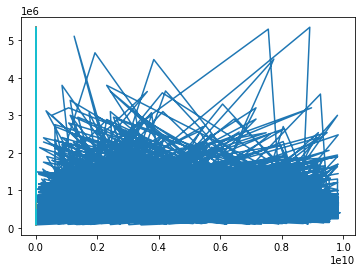

In [385]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
plt.plot(x_train, y_train)

Let's examine the distribution of the predicted values of the training data.


Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
sns.displot(yhat_test)

Figure 1: Plot of predicted values using the training data compared to the actual values of the training data.


So far, the model seems to be doing well in learning from the training dataset. But what happens when the model encounters new data from the testing dataset? When the model generates new values from the test data, we see the distribution of the predicted values is much different from the actual target values.


Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

Figure 2: Plot of predicted value using the test data compared to the actual values of the test data.


<p>Comparing Figure 1 and Figure 2, it is evident that the distribution of the test data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent in the range of 5000 to 15,000. This is where the shape of the distribution is extremely different. Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.</p>


In [358]:
from sklearn.preprocessing import PolynomialFeatures

<h4>Overfitting</h4>
<p>Overfitting occurs when the model fits the noise, but not the underlying process. Therefore, when testing your model using the test set, your model does not perform as well since it is modelling noise, not the underlying process that generated the relationship. Let's create a degree 5 polynomial model.</p>


Let's use 55 percent of the data for training and the rest for testing:


In [359]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

We will perform a degree 5 polynomial transformation on the feature <b>'horsepower'</b>.


In [360]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['sqft_living']])
x_test_pr = pr.fit_transform(x_test[['sqft_living']])
pr

PolynomialFeatures(degree=5)

Now, let's create a Linear Regression model "poly" and train it.


In [361]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

We can see the output of our model using the method "predict." We assign the values to "yhat".


In [362]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 379585.9476058 , 1407637.38091586,  381074.34624209,
        339756.73885336,  799497.21769701])

Let's take the first five predicted values and compare it to the actual targets.


In [374]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 379585.9476058  1407637.38091586  381074.34624209  339756.73885336]
True values: [ 297000 1578000  562100  631500]


We will use the function "PollyPlot" that we defined at the beginning of the lab to display the training data, testing data, and the predicted function.


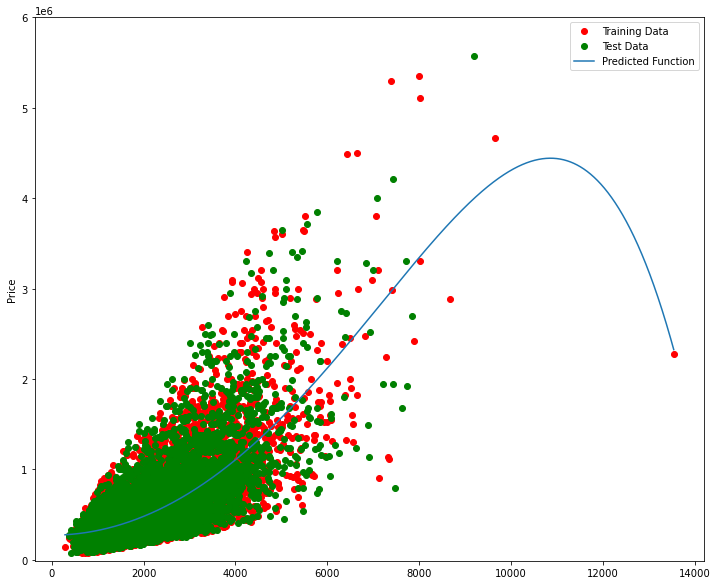

In [368]:
PollyPlot(x_train[['sqft_living']], x_test[['sqft_living']], y_train, y_test, poly,pr)

Figure 3: A polynomial regression model where red dots represent training data, green dots represent test data, and the blue line represents the model prediction.


We see that the estimated function appears to track the data but around 10,000 sq feet, the function begins to diverge from the data points.


R^2 of the training data:


In [369]:
poly.score(x_train_pr, y_train)

0.5321847634199297

R^2 of the test data:


In [176]:
poly.score(x_test_pr, y_test)

0.5491451110961291

We see the R^2 for the training data is 0.5322 while the R^2 on the test data was 54.91.  The lower the R^2, the worse the model. A negative R^2 is a sign of overfitting.


Let's see how the R^2 changes on the test data for different order polynomials and then plot the results:


Text(3, 0.75, 'Maximum R^2 ')

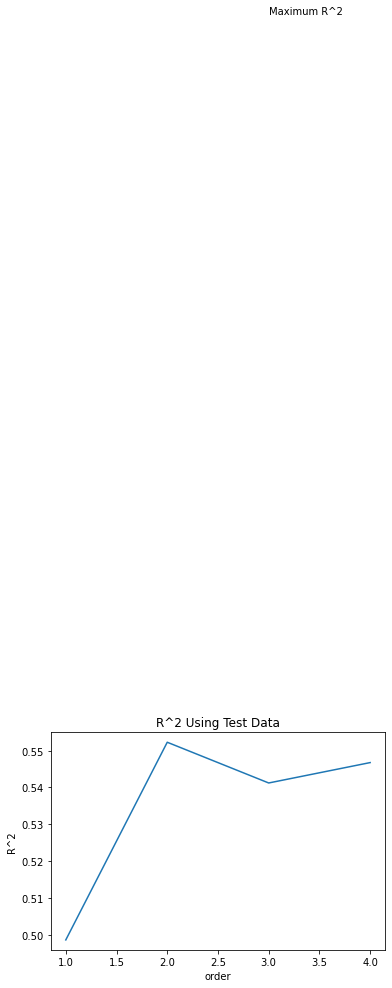

In [178]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['sqft_living']])
    
    x_test_pr = pr.fit_transform(x_test[['sqft_living']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

We see the R^2 gradually increases until an order three polynomial is used. Then, the R^2 dramatically decreases at an order four polynomial.


The following function will be used in the next section. Please run the cell below.


In [179]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['sqft_living']])
    x_test_pr = pr.fit_transform(x_test[['sqft_living']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['sqft_living']], x_test[['sqft_living']], y_train,y_test, poly, pr)

The following interface allows you to experiment with different polynomial orders and different amounts of data.


In [180]:
interact(f, order=(0, 10, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=5, description='order', max=10), FloatSlider(value=0.45, description='te…

<function __main__.f(order, test_data)>

In [182]:
# We can perform polynomial transformations with more than one feature. 
# Create a "PolynomialFeatures" object "pr1" of degree two
pr1=PolynomialFeatures(degree=2)

In [183]:
# use the method "fit_transform"
x_train_pr1=pr1.fit_transform(x_train[['sqft_living', 'floors', 'condition', 'yr_built']])

x_test_pr1=pr1.fit_transform(x_test[['sqft_living', 'floors', 'condition', 'yr_built']])

<!-- The answer is below:

x_train_pr1=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

-->


In [184]:
# check number of dimensions
x_train_pr1.shape #there are now 15 features

(11887, 15)

In [186]:
# method "fit" using the polynomial features 
poly1=LinearRegression().fit(x_train_pr1,y_train)

<h2 id="ref3">Part 3: Ridge Regression</h2> 


Let's perform a degree two polynomial transformation on our data.


In [188]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['sqft_living', 'floors', 'condition', 'yr_built' , 'bedrooms' , 'bathrooms' , 'waterfront' , 'grade' , 'sqft_lot15']])
x_test_pr=pr.fit_transform(x_test[['sqft_living', 'floors', 'condition', 'yr_built' , 'bedrooms' , 'bathrooms' , 'waterfront' , 'grade' , 'sqft_lot15']])

Let's import  <b>Ridge</b>  from the module <b>linear models</b>.


In [189]:
from sklearn.linear_model import Ridge

Let's create a Ridge regression object, setting the regularization parameter (alpha) to 0.1


In [191]:
RigeModel=Ridge(alpha=0.1)

Like regular regression, you can fit the model using the method <b>fit</b>.


In [192]:
RigeModel.fit(x_train_pr, y_train)

/Users/arturkocketkov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.00151e-25): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


Ridge(alpha=0.1)

Similarly, you can obtain a prediction:


In [193]:
yhat = RigeModel.predict(x_test_pr)

Let's compare the first five predicted samples to our test set:


In [194]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 434522.72036152 1838542.13555746  527659.87532364  584899.50456165]
test set : [ 297000. 1578000.  562100.  631500.]


We select the value of alpha that minimizes the test error. To do so, we can use a for loop. We have also created a progress bar to see how many iterations we have completed so far.


In [197]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,10))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

  0%|               | 0/10 [00:00<?, ?it/s, Test Score=0.713, Train Score=0.718]/Users/arturkocketkov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.84273e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
  0%|               | 0/10 [00:00<?, ?it/s, Test Score=0.711, Train Score=0.715]/Users/arturkocketkov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.97325e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
  0%|               | 0/10 [00:00<?, ?it/s, Test Score=0.711, Train Score=0.715]/Users/arturkocketkov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.96457e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
  0%|               | 0/10 [00:00<?, ?it/s, Test Score=0.711, Train Sc

We can plot out the value of R^2 for different alphas:


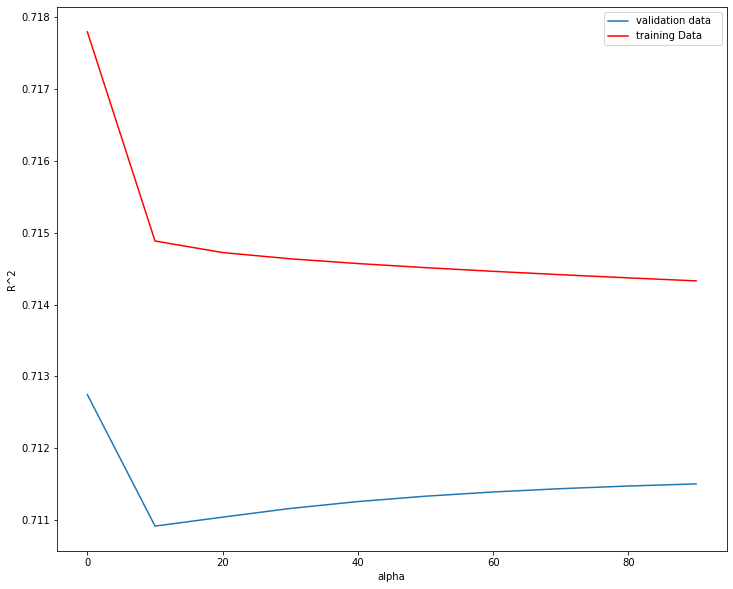

In [198]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

**Figure 4**: The blue line represents the R^2 of the validation data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alpha.


Here the model is built and tested on the same data, so the training and test data are the same.

The red line in Figure 4 represents the R^2 of the training data. As alpha increases the R^2 decreases. Therefore, as alpha increases, the model performs worse on the training data

The blue line represents the R^2 on the validation data. As the value for alpha increases, the R^2 increases and converges at a point.


In [199]:
# Write your code below and press Shift+Enter to execute 
RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

/Users/arturkocketkov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.84273e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


0.7109195194404003

<h2 id="ref4">Part 4: Grid Search</h2>


The term alpha is a hyperparameter. Sklearn has the class <b>GridSearchCV</b> to make the process of finding the best hyperparameter simpler.


Let's import <b>GridSearchCV</b> from  the module <b>model_selection</b>.


In [200]:
from sklearn.model_selection import GridSearchCV

We create a dictionary of parameter values:


In [211]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 10000000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 10000000]}]

Create a Ridge regression object:


In [212]:
RR=Ridge()
RR

Ridge()

Create a ridge grid search object:


In [213]:
Grid1 = GridSearchCV(RR, parameters1,cv=9)

In order to avoid a deprecation warning due to the iid parameter, we set the value of iid to "None".

Fit the model:


In [214]:
Grid1.fit(x_data[['sqft_living', 'floors', 'condition', 'yr_built' , 'bedrooms' , 'bathrooms' , 'waterfront' , 'grade' , 'sqft_lot15']], y_data)

GridSearchCV(cv=9, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    10000000]}])

The object finds the best parameter values on the validation data. We can obtain the estimator with the best parameters and assign it to the variable BestRR as follows:


In [215]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=1)

We now test our model on the test data:


In [217]:
BestRR.score(x_test[['sqft_living', 'floors', 'condition', 'yr_built' , 'bedrooms' , 'bathrooms' , 'waterfront' , 'grade' , 'sqft_lot15']], y_test)

0.642723383923782